In [47]:
#importing the packages that are needed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
#Reading CSV file as df
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [50]:
#printing the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [51]:
# Checking for the null values in the data
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [52]:
#changing the data type to a category removing objects from dataframe
df.CarName=df.CarName.astype('category').cat.codes
df.fueltype=df.fueltype.astype('category').cat.codes
df.fuelsystem=df.fuelsystem.astype('category').cat.codes
df.aspiration=df.aspiration.astype('category').cat.codes
df.doornumber=df.doornumber.astype('category').cat.codes
df.carbody=df.carbody.astype('category').cat.codes
df.drivewheel=df.drivewheel.astype('category').cat.codes
df.enginelocation=df.enginelocation.astype('category').cat.codes
df.enginetype=df.enginetype.astype('category').cat.codes
df.cylindernumber=df.cylindernumber.astype('category').cat.codes
df.dtypes


car_ID                int64
symboling             int64
CarName               int16
fueltype               int8
aspiration             int8
doornumber             int8
carbody                int8
drivewheel             int8
enginelocation         int8
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype             int8
cylindernumber         int8
enginesize            int64
fuelsystem             int8
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [53]:
df.isnull().sum()#double checking null value

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

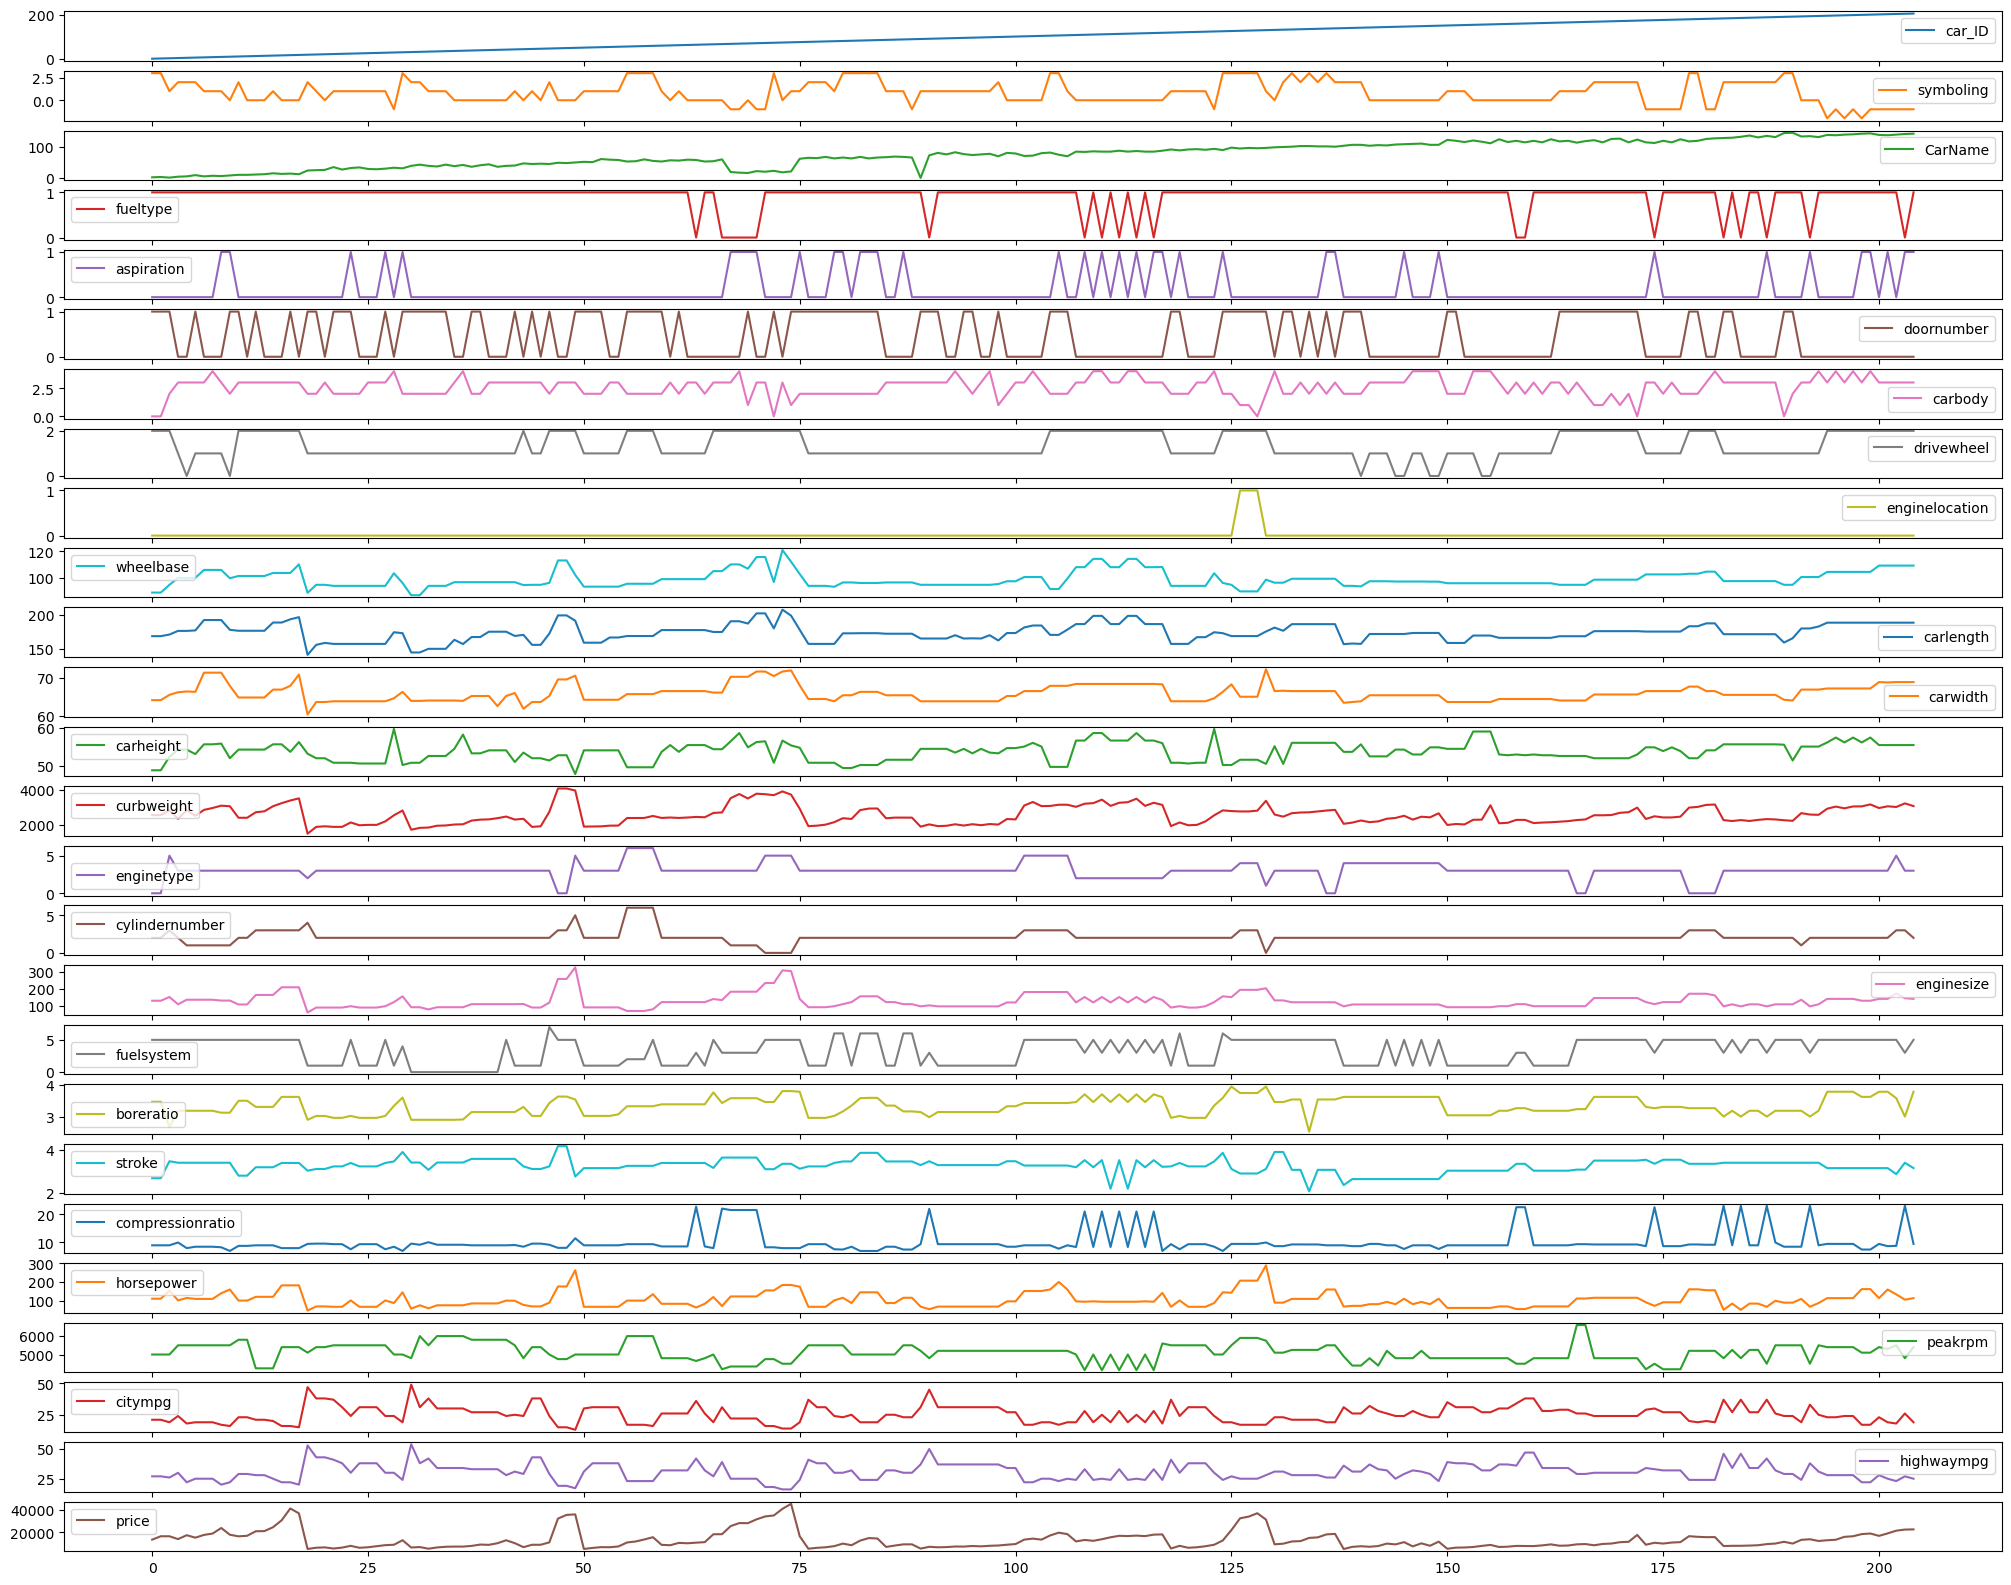

In [54]:
df.plot(subplots=True, figsize=(25,20))#ploting all column values

array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'CarName'}>,
        <Axes: title={'center': 'fueltype'}>,
        <Axes: title={'center': 'aspiration'}>],
       [<Axes: title={'center': 'doornumber'}>,
        <Axes: title={'center': 'carbody'}>,
        <Axes: title={'center': 'drivewheel'}>,
        <Axes: title={'center': 'enginelocation'}>,
        <Axes: title={'center': 'wheelbase'}>],
       [<Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginetype'}>],
       [<Axes: title={'center': 'cylindernumber'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'fuelsystem'}>,
        <Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>],
       [<Axes: title={'center': 'compressionratio'}

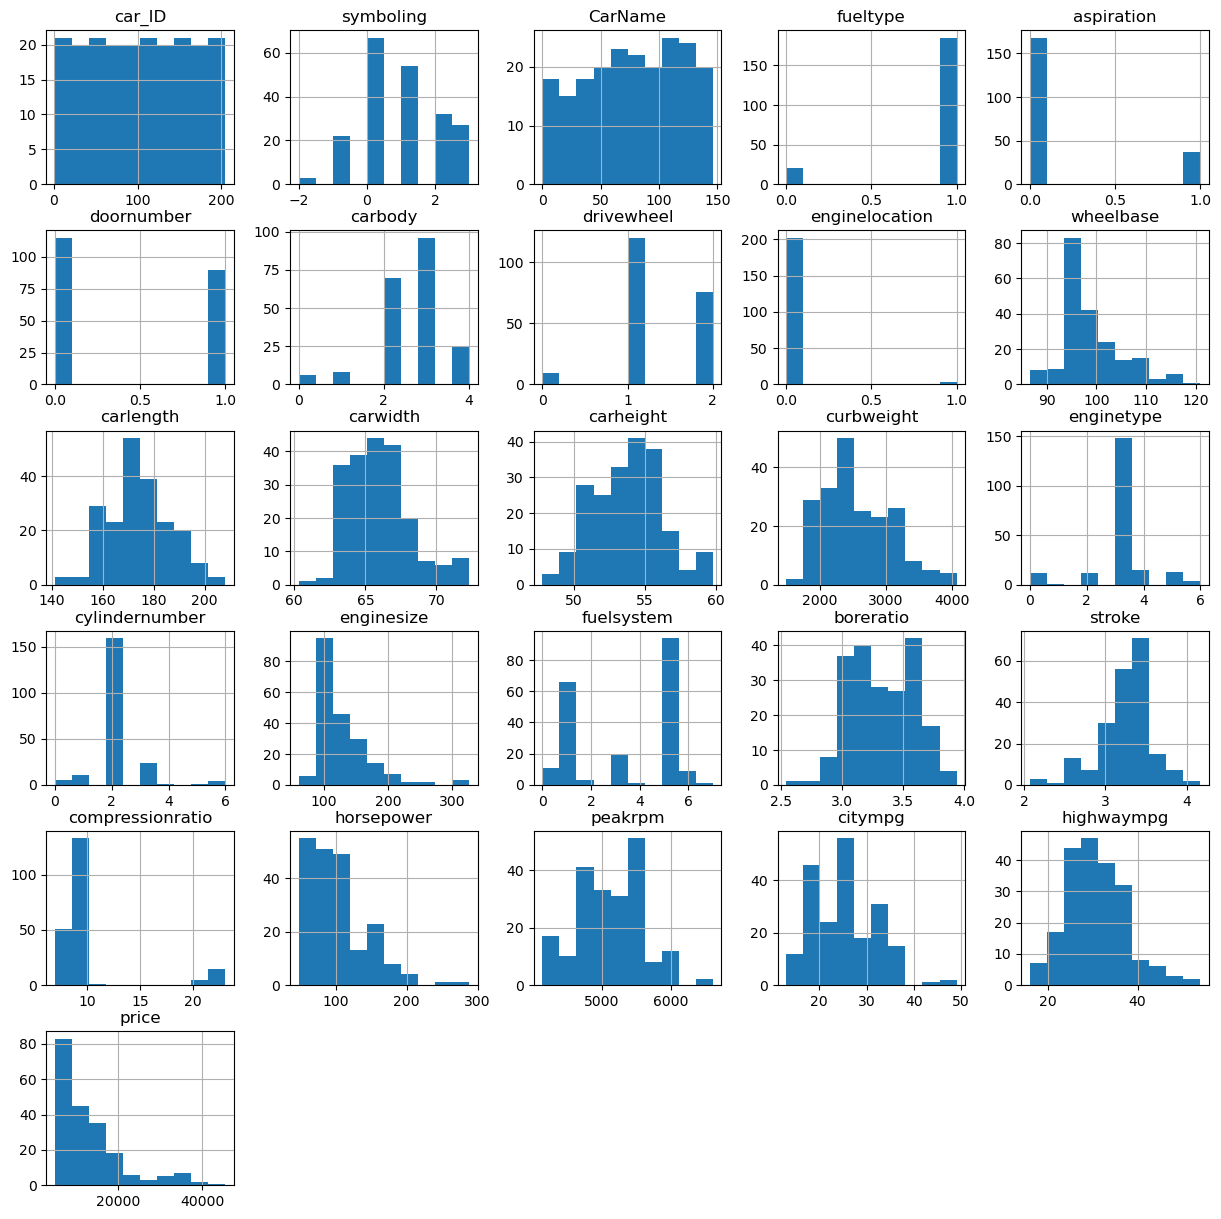

In [55]:
df.hist(bins=10,figsize=(15,15))

In [56]:
df.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


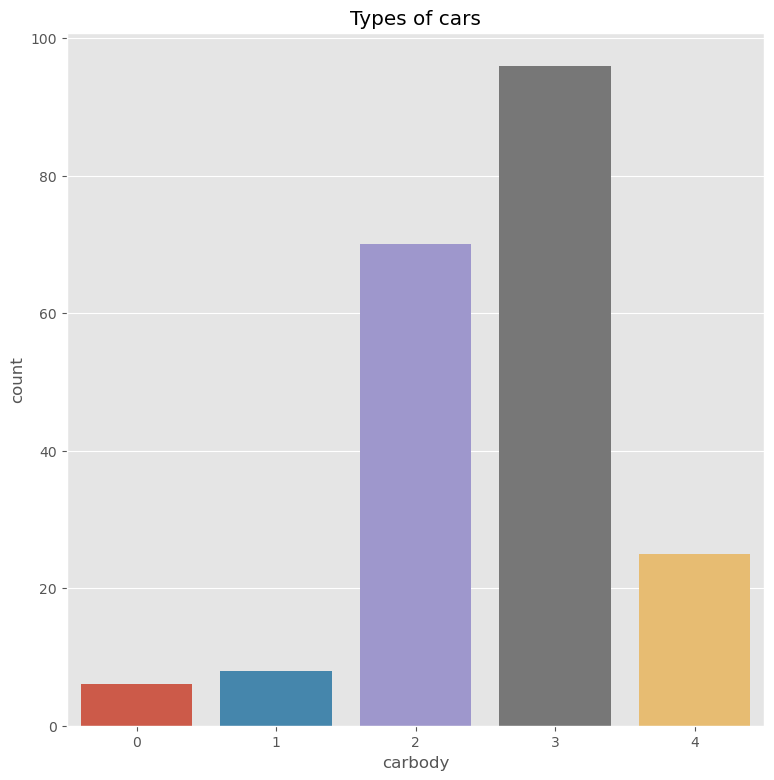

In [57]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(9,9))
    plt.title("Types of cars")
    sns.countplot(data=df,x=df['carbody'])
    plt.show()

In [58]:
x_value=df.drop(["price"],axis=1)#dropping price because price our predicted variable
y_value=df["price"]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_value,y_value,train_size=0.8)
model=LinearRegression()#model instialization
#traning model
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
ac=model.score(x_test,y_test)

In [60]:
def accuracy(x_value,y_value,split=0.8):
    x_train,x_test,y_train,y_test=train_test_split(x_value,y_value,train_size=split)
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    ac=model.score(x_test,y_test)
    
    return rmse,ac

arr_rmse=[]
arr_ac=[]
for i in range(20):
    rmse,ac=accuracy(x_value,y_value,split=.85)
    arr_rmse.append(rmse)
    arr_ac.append(ac)
        
#getting the average value through range function    

In [61]:
print(f"The average of rmse is {round(np.average(arr_rmse),2)}")
print(f"The accuracy of model is {round(np.average(arr_ac)*100,2)}%")

The average of rmse is 3039.49
The accuracy of model is 82.79%


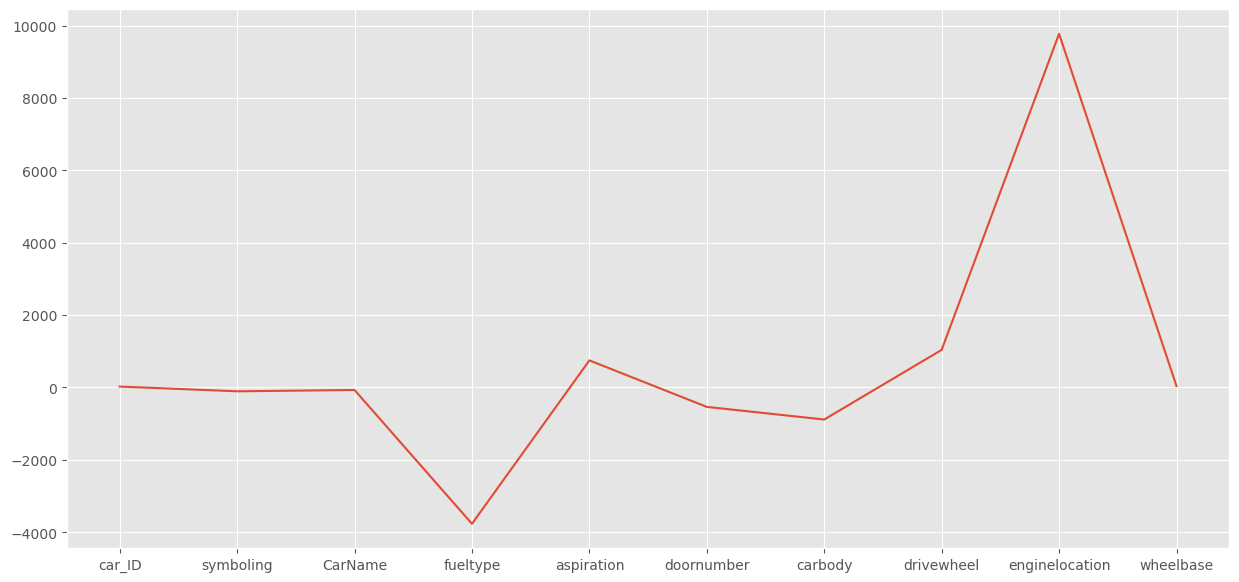

In [63]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(15,7))
    plt.plot(x_value.columns[:10],model.coef_[:10])